<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-Early-Warning-Signals-on-Real-Dataset" data-toc-modified-id="Using-Early-Warning-Signals-on-Real-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Early Warning Signals on Real Dataset</a></span></li><li><span><a href="#Select-a-time-period" data-toc-modified-id="Select-a-time-period-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select a time period</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Standard Deviation</a></span><ul class="toc-item"><li><span><a href="#Dam" data-toc-modified-id="Dam-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dam</a></span></li><li><span><a href="#Rain" data-toc-modified-id="Rain-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Rain</a></span></li><li><span><a href="#ONI" data-toc-modified-id="ONI-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>ONI</a></span></li></ul></li><li><span><a href="#Autocorrelation-with-Lag-1" data-toc-modified-id="Autocorrelation-with-Lag-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Autocorrelation with Lag 1</a></span><ul class="toc-item"><li><span><a href="#Dam" data-toc-modified-id="Dam-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dam</a></span></li><li><span><a href="#Rain" data-toc-modified-id="Rain-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Rain</a></span></li><li><span><a href="#ONI" data-toc-modified-id="ONI-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>ONI</a></span></li></ul></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Skewness</a></span><ul class="toc-item"><li><span><a href="#Dam" data-toc-modified-id="Dam-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Dam</a></span></li><li><span><a href="#Rain" data-toc-modified-id="Rain-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Rain</a></span></li><li><span><a href="#ONI" data-toc-modified-id="ONI-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>ONI</a></span></li></ul></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Kurtosis</a></span><ul class="toc-item"><li><span><a href="#Dam" data-toc-modified-id="Dam-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Dam</a></span></li><li><span><a href="#Rain" data-toc-modified-id="Rain-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Rain</a></span></li><li><span><a href="#ONI" data-toc-modified-id="ONI-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>ONI</a></span></li></ul></li></ul></li></ul></div>

# Using Early Warning Signals on Real Dataset

Variables:
* **ONI (Oceanic Niño Index)** - measure of the departure from normal sea surface temperature in the east-central Pacific Ocean
* **Rain** - rainfall
* **Dam** - dam level

References:
- https://www.climate.gov/news-features/understanding-climate/climate-variability-oceanic-ni%C3%B1o-index
- https://en.wikipedia.org/wiki/Typhoons_in_the_Philippines
- https://www.scientificamerican.com/article/did-global-warming-slow-down-in-the-2000s-or-not/
- https://towardsdatascience.com/calculate-kurtosis-in-python-with-examples-pyshark-2b960301393
- https://online.stat.psu.edu/stat462/node/188/
- https://onlinelibrary.wiley.com/doi/10.1111/j.1461-0248.2008.01160.x#:~:text=It%20is%20shown%20that%20changes,both%20routes%20to%20regime%20shifts.
- https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020GL089183
- https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature#:~:text=Increases%20in%20sea%20surface%20temperature%20have%20led%20to%20an%20increase,water%20vapor%20over%20the%20oceans.&text=This%20water%20vapor%20feeds%20weather,and%20Tropical%20Cyclone%20Activity%20indicators).

In [3]:
!pip install pymannkendall

Defaulting to user installation because normal site-packages is not writeable


In [64]:
import sys
import pandas as pd

import matplotlib.pylab as plt

from ews import *

In [65]:
full_data = pd.read_csv('Angat_dataset_raw.csv')
print(full_data.shape)
full_data.head()

(7471, 6)


,Date,Rain,ONI,NIA,MWSS,Dam
0,01/01/2001,0.0,-0.7,38.225693,44.73,214.60
1,01/02/2001,0.0,-0.7,57.996530,45.98,214.55
2,01/03/2001,0.0,-0.7,49.119213,45.98,214.38
3,01/04/2001,0.0,-0.7,47.034720,44.69,214.18
4,01/05/2001,0.0,-0.7,42.223380,47.17,213.96


In [66]:
data = full_data.copy()
data_clean = data.dropna().reset_index(drop=True)
data_clean.head()

,Date,Rain,ONI,NIA,MWSS,Dam
0,01/01/2001,0.0,-0.7,38.225693,44.73,214.60
1,01/02/2001,0.0,-0.7,57.996530,45.98,214.55
2,01/03/2001,0.0,-0.7,49.119213,45.98,214.38
3,01/04/2001,0.0,-0.7,47.034720,44.69,214.18
4,01/05/2001,0.0,-0.7,42.223380,47.17,213.96


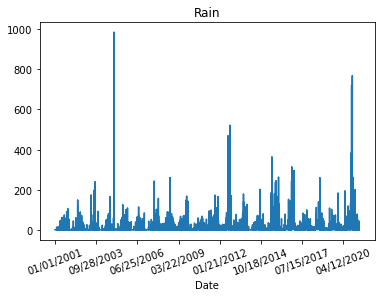

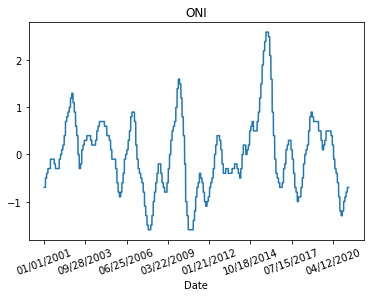

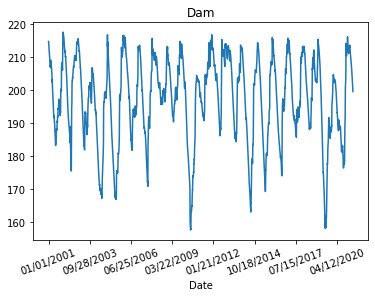

In [67]:
for column in data_clean.columns:
    if (column != 'Date') and (column != 'NIA') and (column != 'MWSS') :
        data_clean[[column, 'Date']].plot(x='Date', rot=20, legend=False, title=column)

# Select a time period

Early warning signals can be used to anticipate extreme changes or transitions in a system. For the case of dam levels, rain, and oceanic nino index, we can make an inference that they can be related to weather patterns in the Philippines. Because of this, we can inspect periods before record-breaking typhoons to see if there are anomalous occurrences.

After inspecting various dates according to this time table (https://en.wikipedia.org/wiki/Typhoons_in_the_Philippines) interesting patterns have been found occurring before Typhoon Pepeng. Typhoon Pepeng was recorded as the wettest tropical cyclone in the last 20 years. It occurred in Baguio in 2009, so we will inspect a period of data before that period.

In [68]:
data_clean.dtypes

Date     object
Rain    float64
ONI     float64
NIA     float64
MWSS    float64
Dam     float64
dtype: object

In [69]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'])
data_clean.dtypes

Date    datetime64[ns]
Rain           float64
ONI            float64
NIA            float64
MWSS           float64
Dam            float64
dtype: object

In [70]:
start_date = '12/31/2004'
end_date = '01/01/2009'

df = data_clean[((data_clean['Date']>start_date) & (data_clean['Date']<end_date))]
df = df.reset_index(drop=True)

print(df.shape)
display(df.head(2))
display(df.tail(2))

(1460, 6)


,Date,Rain,ONI,NIA,MWSS,Dam
0,2005-01-01,0.0,0.6,26.593750,46.99,207.41
1,2005-01-02,0.0,0.6,27.998842,46.99,207.20


,Date,Rain,ONI,NIA,MWSS,Dam
1458,2008-12-30,0.0,-0.7,47.061344,37.59,207.55
1459,2008-12-31,4.6,-0.7,46.336807,37.48,207.41


In [71]:
data_clean['Date'] = data_clean['Date'].astype(str)
df['Date'] = df['Date'].astype(str)

display(data_clean.dtypes)
display(df.dtypes)

Date     object
Rain    float64
ONI     float64
NIA     float64
MWSS    float64
Dam     float64
dtype: object

Date     object
Rain    float64
ONI     float64
NIA     float64
MWSS    float64
Dam     float64
dtype: object

In [72]:
df.head(2)

,Date,Rain,ONI,NIA,MWSS,Dam
0,2005-01-01,0.0,0.6,26.593750,46.99,207.41
1,2005-01-02,0.0,0.6,27.998842,46.99,207.20


## Standard Deviation
### Dam

- utility function: `ews.py`
- helper function

Mann Kendall Test Results
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.8898600153664524
Slope : -0.004951239974880113


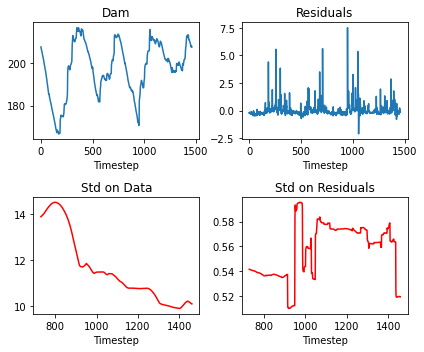

In [73]:
dic = {'data': df.Dam, 
      'title': 'Dam',
      'method_name': 'Std'}

plot(df, dic) # make a dict because "plot" function in ews.py accepts a dict with this structure

## mann kendall in utility function: feed it what you have processed already (orig_process)

When inspecting the dam level values and looking at its standard deviation alone, we see there is actually a decreasing trend. Standard deviation is supposed to increase if this were to be considered an early warning signal. So in this case, it is not.

### Rain

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.7422108951895509
Slope : 0.007361030631369266


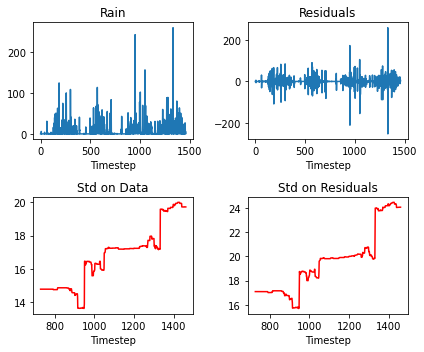

In [74]:
dic = {'data': df.Rain, 
      'title': 'Rain',
      'method_name': 'Std'}

plot(df, dic)

Getting the standard deviation of rain values shows a different result. It has a significant increasing trend, as tested using the Mann Kendall Trend Test. This could be considered an early warning signal as the increase in variance of the values might point to the flickering behavior of the system.

### ONI

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.5511346813335082
Slope : 0.00048155960272942047


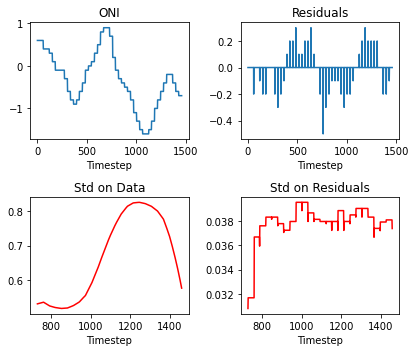

In [75]:
dic = {'data': df.ONI, 
      'title': 'ONI',
      'method_name': 'Std'}

plot(df, dic)

For the oceanic nino index, there was a significant increasing trend in standard deviation as well. This may again be an early warning signal, as an increasing standard deviation could mean that values are experiencing a slow recovery to its stable state. This would mean that as the system recovers very slowly, it "drifts" around the stable state, leading to a wide variation in its values.

## Autocorrelation with Lag 1
### Dam

Mann Kendall Test Results
-------------------------
Trend : no trend
h : False
p : 0.4029176624156552
Tau : 0.020677248280643892
Slope : 2.0135753787795728e-07


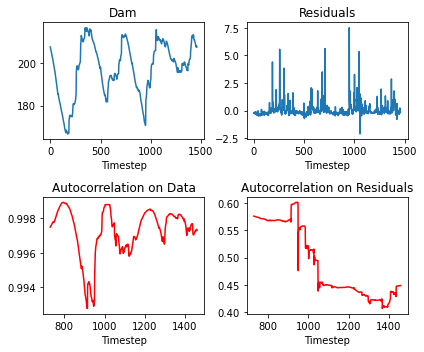

In [76]:
dic = {'data': df.Dam, 
      'title': 'Dam',
      'method_name': 'Autocorrelation'}

plot(df, dic)

There was no trend found for the dam level values in terms of autocorrelation at lag 1. This leads us to wonder if there is a connection between the fact that all other explored variables exhibited early warning signals except for dam levels in the previous test.

### Rain

Mann Kendall Test Results
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.40472237317991866
Slope : -4.467112160361347e-05


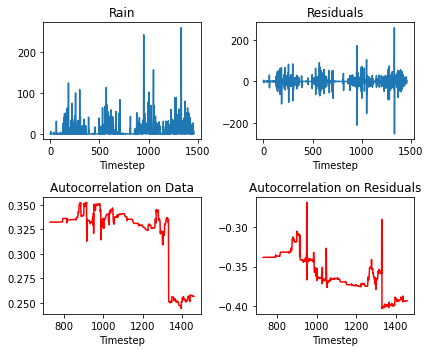

In [77]:
dic = {'data': df.Rain, 
      'title': 'Rain',
      'method_name': 'Autocorrelation'}

plot(df, dic)

There was a decreasing trend found for the autocorrelated values of rain, which does not qualify it to be an early warning signal.

### ONI

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.006008206349634948
Tau : 0.0679084759102749
Slope : 7.977205241560836e-07


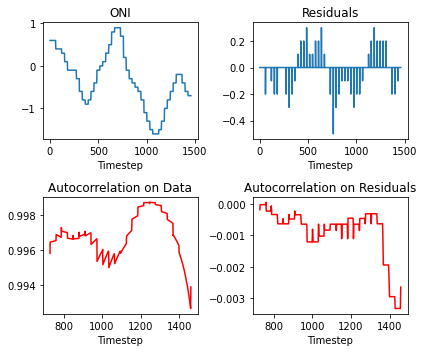

In [78]:
dic = {'data': df.ONI, 
      'title': 'ONI',
      'method_name': 'Autocorrelation'}

plot(df, dic)

For the oceanic nino index, there was an increasing trend in autocorrelation found. This would mean that the state of the system became more similar between consecutive observations, or that it became more similar with its recent states. This trend was significant, according to the Mann Kendall Trend Test, and therefore we can say it could be an early warning signal.

## Skewness
### Dam

Mann Kendall Test Results
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.47719580983078164
Slope : -0.000686272884943453


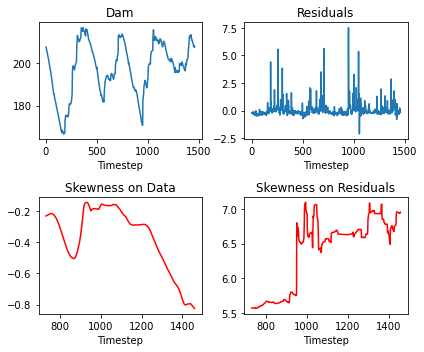

In [79]:
dic = {'data': df.Dam, 
      'title': 'Dam',
      'method_name': 'Skewness'}

plot(df, dic)

There was a significant decreasing trend observed for the skewness of the data. When there is a change in the skewness, this means the distribution of data is changing, and leads to an asymmetric distribution. Because of this, we can say this test identified an early warning signal for dam levels specifically, while the others did not. This could be because of the system being pushed from one state to another due to a disturbance, leading to a change it its distribution.

### Rain

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.3936322920375541
Slope : 0.0037265207030721223


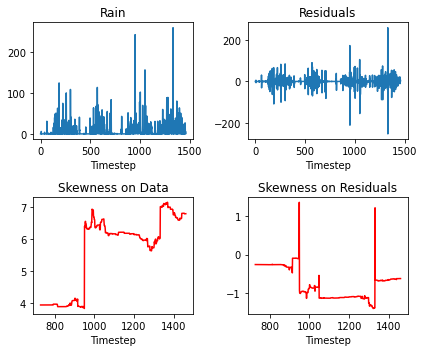

In [80]:
dic = {'data': df.Rain, 
      'title': 'Rain',
      'method_name': 'Skewness'}

plot(df, dic)

There was also an increasing trend observed for the rain data, with an increasing skewness being observed. This is also an early warning signal, because it would mean that values are not evenly distributed, and there may be more outliers occuring. This would tie in well with the fact that a super typhoon Pepeng was later recorded in 2009 with the 2nd most rainfall the country has experienced from a typhoon since 1911.

### ONI

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.2740812922811686
Slope : 0.0004704251644432342


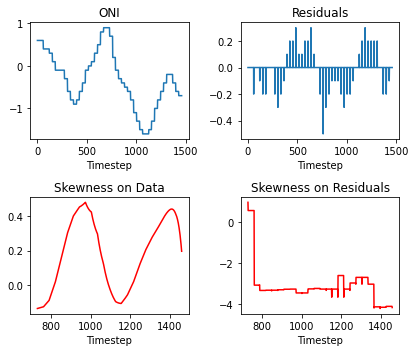

In [81]:
dic = {'data': df.ONI, 
      'title': 'ONI',
      'method_name': 'Skewness'}

plot(df, dic)

The oceanic nino index was also found to have a significant increasing trend in skewness, and can be considered an early warning signal. This could be due to the fact that ocean temperatures affect the amount of water vapor in the air, and in turn affect the amount of rainfall and generation of typhoons. These changing temperatures in the ocean might have been one of the reasons Typhoon Pepeng occurred in 2009.

## Kurtosis

In [82]:
from scipy.stats import kurtosis

### Dam

In [83]:
orig = df.Dam
diff = pd.DataFrame(difference(orig))
win_size = int(len(orig)/2)

In [84]:
orig_process = orig.rolling(int(win_size)).apply(kurtosis)
resid = diff.rolling(int(win_size)).apply(kurtosis)

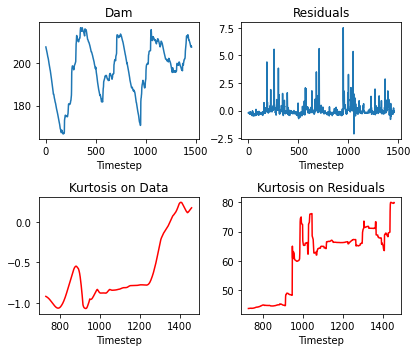

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5)) 

axes[0, 0].plot(orig)
axes[0, 0].set_title('Dam')
axes[0, 0].set_xlabel("Timestep")

axes[0, 1].plot(diff)
axes[0, 1].set_title("Residuals")
axes[0, 1].set_xlabel("Timestep")

axes[1, 0].plot(orig_process, color="red")
axes[1, 0].set_title("Kurtosis on Data")
axes[1, 0].set_xlabel("Timestep")

axes[1, 1].plot(resid, color="red")
axes[1, 1].set_title("Kurtosis on Residuals")
axes[1, 1].set_xlabel("Timestep")

fig.tight_layout()

In [86]:
ml_result = mk.original_test(orig_process)
print ('Mann Kendall Test Results')
print ('-------------------------')
print(f'Trend : {ml_result.trend}')
print(f'h : {ml_result.h}')
print(f'p : {ml_result.p}')
print(f'Tau : {ml_result.Tau}')
print(f'Slope : {ml_result.slope}')

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.7196034705694957
Slope : 0.001154283925471782


The results above show that there was an increasing trend in kurtosis for the values of dam levels from 2005-2008. This could indicate the approach of a critical transition because there are more extreme values being observed in the dataset. A high kurtosis value would mean there outliers are more common compared to a normal distribution. It is interesting to note that the dam level values only showed early warning signals when both skewness and kurtosis were analyzed, possibly due to their focus on outliers.

### Rain

In [87]:
orig = df.Rain
diff = pd.DataFrame(difference(orig))
win_size = int(len(orig)/2)

In [88]:
orig_process = orig.rolling(int(win_size)).apply(kurtosis)
resid = diff.rolling(int(win_size)).apply(kurtosis)

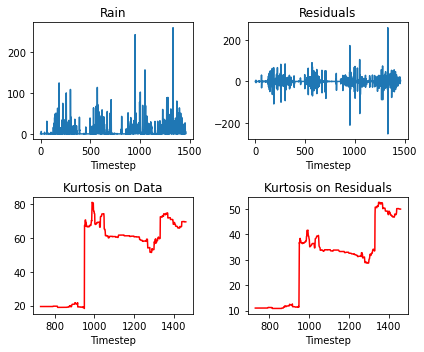

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5)) 

axes[0, 0].plot(orig)
axes[0, 0].set_title('Rain')
axes[0, 0].set_xlabel("Timestep")

axes[0, 1].plot(diff)
axes[0, 1].set_title("Residuals")
axes[0, 1].set_xlabel("Timestep")

axes[1, 0].plot(orig_process, color="red")
axes[1, 0].set_title("Kurtosis on Data")
axes[1, 0].set_xlabel("Timestep")

axes[1, 1].plot(resid, color="red")
axes[1, 1].set_title("Kurtosis on Residuals")
axes[1, 1].set_xlabel("Timestep")

fig.tight_layout()

In [90]:
ml_result = mk.original_test(orig_process)
print ('Mann Kendall Test Results')
print ('-------------------------')
print(f'Trend : {ml_result.trend}')
print(f'h : {ml_result.h}')
print(f'p : {ml_result.p}')
print(f'Tau : {ml_result.Tau}')
print(f'Slope : {ml_result.slope}')

Mann Kendall Test Results
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.3596911717856942
Slope : 0.05844001261839842


The values of rain data show an increasing trend in terms of kurtosis, which could indicate flickering or large disturbances causing the system to possess more extreme values as it approaches a critical transition. Extreme values in the case of rainfall could mean very little rainfall or too much. These patterns are also characteristic of the effects we experience due to climate change, where extreme weather events have been occurring throughout the globe more often. Again, this could be used as an early indicator for the Typhoon Pepeng that occurred a few months later.

### ONI

In [91]:
orig = df.ONI
diff = pd.DataFrame(difference(orig))
win_size = int(len(orig)/2)

In [92]:
orig_process = orig.rolling(int(win_size)).apply(kurtosis)
resid = diff.rolling(int(win_size)).apply(kurtosis)

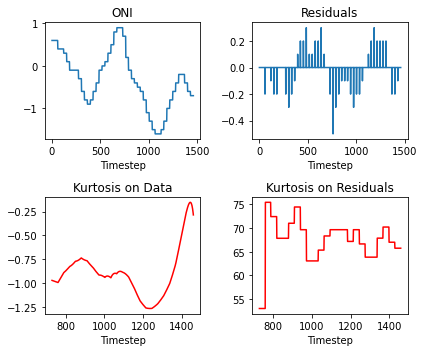

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5)) 

axes[0, 0].plot(orig)
axes[0, 0].set_title('ONI')
axes[0, 0].set_xlabel("Timestep")

axes[0, 1].plot(diff)
axes[0, 1].set_title("Residuals")
axes[0, 1].set_xlabel("Timestep")

axes[1, 0].plot(orig_process, color="red")
axes[1, 0].set_title("Kurtosis on Data")
axes[1, 0].set_xlabel("Timestep")

axes[1, 1].plot(resid, color="red")
axes[1, 1].set_title("Kurtosis on Residuals")
axes[1, 1].set_xlabel("Timestep")

fig.tight_layout()

In [94]:
ml_result = mk.original_test(orig_process)
print ('Mann Kendall Test Results')
print ('-------------------------')
print(f'Trend : {ml_result.trend}')
print(f'h : {ml_result.h}')
print(f'p : {ml_result.p}')
print(f'Tau : {ml_result.Tau}')
print(f'Slope : {ml_result.slope}')

Mann Kendall Test Results
-------------------------
Trend : decreasing
h : True
p : 0.00035642148796277695
Tau : -0.08825215973614677
Slope : -0.00018062089263440329


There was a significant decreasing trend found for the kurtosis of the oceanic nino index variable. However, only increasing kurtosis indicates extreme values and can be used as an early warning signal. It is interesting to note that the oceanic nino index displayed early warning signals when using all other metrics except this.